# Assignment 6 : Missing- Data Handling Methods

This assignment compares various missing-data handling methods (median, LR, KNN and deletion) for improving credit risk prediction.

# Part A 1) Data Loading and Preparation

The data is loaded.

Introducing MAR missing values:

- We choose three numerical features which are AGE, BILL_AMT1, and BILL_AMT2 — to introduce missing values.
- This is beacuse these columns are typical candidates that might contain missing data in real-world datasets.

- We set the fraction of missing values to 5% (missing_frac = 0.05), meaning that approximately 5% of the entries in each of these columns will be replaced with NaN.

- We create a new copy called df_missing to preserve the original data for comparison later.

- Using np.random.seed(42) ensures that the random selection of missing indices is consistent across multiple runs, so results are reproducible.

- For each selected column:
Randomly sample 5% of its rows using df_missing.sample(frac=missing_frac).index.

Replace the corresponding cells with NaN using df_missing.loc[missing_indices, col] = np.nan.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of original dataset: (30000, 25)

Columns in dataset:
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']

Missing values introduced
AGE          1500
BILL_AMT1    1500
BILL_AMT2    1500
dtype: int64


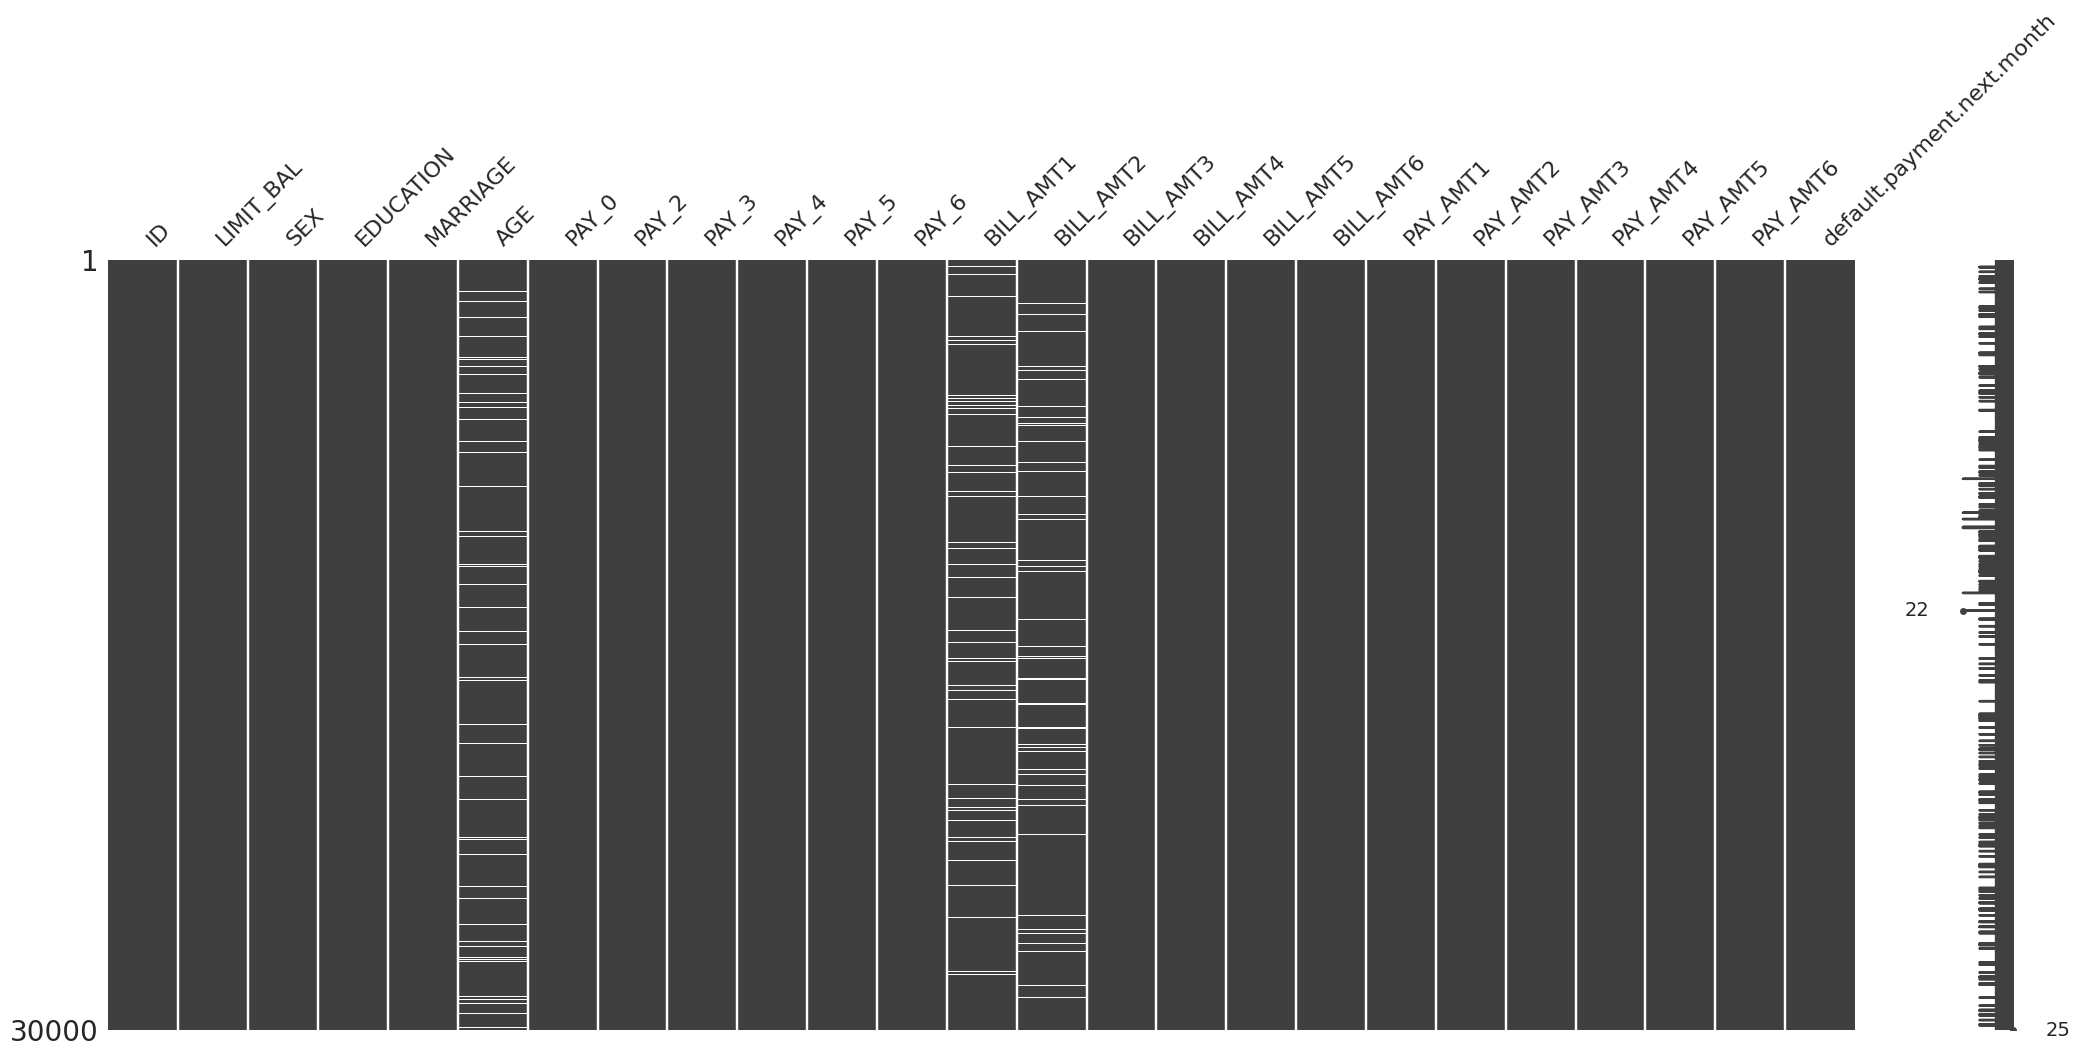

In [156]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

!pip install missingno
import missingno as msno

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/UCI_Credit_Card.csv'
df = pd.read_csv(path)

print("Shape of original dataset:", df.shape)
print("\nColumns in dataset:")
print(df.columns.tolist())

df.head()

cols_with_missing = ['AGE', 'BILL_AMT1', 'BILL_AMT2']

missing_frac = 0.05

df_missing = df.copy()
np.random.seed(42)  # reproducibility

for col in cols_with_missing:
    missing_indices = df_missing.sample(frac=missing_frac).index
    df_missing.loc[missing_indices, col] = np.nan

print("\nMissing values introduced")
print(df_missing[cols_with_missing].isnull().sum())

msno.matrix(df_missing)
plt.show()

As we see here, AGE, BILL_AMT1 and BILL_AMT2 have missing values introduced successfully.

# Part A 2) Median Imputation

- We first make a copy of the dataset containing missing values so that the original data remains unchanged. This copied dataset will undergo median imputation while the original continues to serve as a reference.

- We identify the columns with missing values ; in this case, AGE, BILL_AMT1, and BILL_AMT2.

- For each of these columns, we compute the median (the middle value when data is sorted).
This median acts as a representative value that is not influenced by extreme observations.

- The missing entries (NaN values) in each column are then replaced with the corresponding median value.
This ensures that every record in the dataset has valid numeric entries for the selected features.


In [157]:
df_median_imputed = df_missing.copy()

for col in cols_with_missing:
    median_value = df_median_imputed[col].median()
    df_median_imputed[col].fillna(median_value, inplace=True)

print("Missing values after imputation:")
print(df_median_imputed[cols_with_missing].isnull().sum())

df_median_imputed.head()

Missing values after imputation:
AGE          0
BILL_AMT1    0
BILL_AMT2    0
dtype: int64


/tmp/ipython-input-3115551640.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median_imputed[col].fillna(median_value, inplace=True)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Why Median instead of Mean?

- The median is a robust measure of central tendency that is less affected by outliers than the mean.
- In real-world datasets, especially financial or medical data, values often show **skewed distributions.**
- For example, the “BILL AMT” features may contain a few very large bills that can **distort the mean.**

- Using the mean could artificially shift imputed values upward or downward if such extreme outliers exist. The median, being the central value, better represents the typical behavior of most data points.

- This method helps preserve the overall distribution shape and reduces bias in the imputed data, making it a simple yet effective baseline for comparison with more complex imputation methods like regression-based or KNN-based imputation.

- Although it doesn’t capture relationships between variables, median imputation provides stability and ensures the model receives complete data without introducing unrealistic extreme values.

# Part A 3) Linear Regression

- We begin by identifying a target column to impute (AGE) which contains missing values introduced earlier.

- The dataset is then divided into two subsets:
Known subset: rows where AGE has valid (non-missing) values.
Unknown subset: rows where AGE is missing and needs to be predicted.

- We select predictor variables — all other numeric columns in the dataset except AGE (the target) and the label column (default.payment.next.month), which should not influence imputation.

- These predictors serve as input features (X_train) for training and input features (X_pred) for prediction on missing rows.
The corresponding AGE values (y_train) form the output variable for training.

- To ensure the regression model can run smoothly, any remaining missing values within the predictors are temporarily filled with median imputed values to mainatain fair comparison across all 3 datasets. This is to tackle errors caused by NaNs in the input features.**This is common for both Linear Regression and KNN**

- A Linear Regression model is then trained on the rows with complete data.
Once trained, the model predicts the missing AGE values based on the relationships learned from the other features.

- The imputed AGE values are then inserted back into the dataset, creating a fully complete Dataset B with linearly estimated values.

In [158]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

target_col = 'AGE'
known = df_missing[df_missing[target_col].notnull()]
unknown = df_missing[df_missing[target_col].isnull()]

print(f"Number of missing values in {target_col} before imputation: {len(unknown)}")

predictors = df_missing.select_dtypes(include=[np.number]).columns.tolist()
predictors.remove(target_col)
if 'default.payment.next.month' in predictors:
    predictors.remove('default.payment.next.month')


X_train = known[predictors]
y_train = known[target_col]
X_pred = unknown[predictors]

for col in predictors:
    median_value = df_missing[col].median()
    X_train[col] = X_train[col].fillna(median_value)
    X_pred[col] = X_pred[col].fillna(median_value)


# 3) Linear Regression

df_linear_imputed = df_missing.copy()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predicted_values_linear = lin_reg.predict(X_pred)

df_linear_imputed.loc[df_linear_imputed[target_col].isnull(), target_col] = predicted_values_linear

print(f"Missing values in {target_col} after linear imputation:",
      df_linear_imputed[target_col].isnull().sum())


Number of missing values in AGE before imputation: 1500
Missing values in AGE after linear imputation: 0


/tmp/ipython-input-94363086.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].fillna(median_value)
/tmp/ipython-input-94363086.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred[col] = X_pred[col].fillna(median_value)


# Reasoning behind Linear Regression

- Regression imputation assumes that the variable with missing data (AGE) can be linearly explained by other observed variables such as bill amounts, payments, and balances.

- This allows for a more context-aware and data-driven imputation compared to simple statistical replacements.

- **The underlying assumption behind this method is that the missingness is Missing At Random (MAR), meaning that the probability of a value being missing is related to the observed data but not to the missing value itself.**

- **For example, missing AGE values might depend on income or bill amount patterns, which are available in the dataset.**

- By leveraging these correlations, regression imputation tends to produce more realistic and consistent estimates that preserve inter-variable relationships in the data.

- However, regression imputation can underestimate variability in the imputed feature because predicted values lie exactly on the regression line, reducing natural randomness in the data.

# Part A 4) Non linear (KNN)

- We create a copy of the dataset containing missing values to generate Dataset C.
- We use the same column (AGE) for imputation.

- Separate rows into known (AGE present) and unknown (AGE missing).
- Select numeric predictors excluding the target column and label.

- We standardize predictors using standardScaler so distance based methods like KNN are not biased by variable scale.

- We train a K-Nearest Neighbors Regressor on the standardized predictors of known rows.
- Then, we predict missing AGE values in unknown rows and fill the missing values.

In [159]:
from sklearn.neighbors import KNeighborsRegressor
df_knn_imputed = df_missing.copy()

scaler = StandardScaler() # standardize predictors for KNN
X_train_scaled = scaler.fit_transform(X_train)
X_pred_scaled = scaler.transform(X_pred)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

predicted_values_knn = knn_reg.predict(X_pred_scaled)

df_knn_imputed.loc[df_knn_imputed[target_col].isnull(), target_col] = predicted_values_knn

print(f"Missing values in {target_col} after KNN imputation:",
      df_knn_imputed[target_col].isnull().sum())

print("\nPreview of Linear Regression Imputed Dataset:")
display(df_linear_imputed.head())

print("\nPreview of KNN (Non-linear) Imputed Dataset:")
display(df_knn_imputed.head())

Missing values in AGE after KNN imputation: 0

Preview of Linear Regression Imputed Dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



Preview of KNN (Non-linear) Imputed Dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Reasoning behind non-linear KNN

- Non-linear regression methods, like K-Nearest Neighbors (KNN) regression, can model complex, non-linear relationships between predictors and the target variable (AGE) that linear models may fail to capture. This is especially important when the relationship between AGE and financial indicators (like bill amounts or payments) is not strictly linear.

- **Missing At Random (MAR) Assumption:** The method assumes that missingness is MAR, meaning the probability of AGE being missing depends on other observed variables in the dataset (like EDUCATION, LIMIT_BAL, PAY_0), but not on AGE itself. This allows the model to reliably estimate missing AGE values based on available information.

- KNN imputes missing values by identifying “similar” rows in the predictor space (i.e., rows with similar values across other features) and using their values to predict the missing entries. This is inherently data-driven and adapts to local patterns in the data.

- Flexibility: Unlike linear regression, KNN does not assume a particular form for the relationship between predictors and the target. This makes it more robust in cases where variables interact in a non-linear way or when extreme values (outliers) might distort a linear fit.

- Preserving Data Patterns: By leveraging the similarity between rows, KNN maintains the multivariate relationships in the dataset, resulting in more realistic imputations that reflect the natural structure of the data.

- This approach is particularly useful in datasets like credit card data, where relationships between variables (age, income, bills, and payments) can be complex and non-linear. It reduces the risk of introducing bias that simple statistical imputations (like mean or median) might cause.

# PART B - Data Split, Standardisation and Model Evaluation

Any other missing values in the dataset are replaced with values from the original dataset below.

Dataset D is created by dropping all rows with NaN values

In [160]:

df_A = df_median_imputed.copy()
df_B = df_linear_imputed.copy()
df_C = df_knn_imputed.copy()

mar_cols = ['AGE', 'BILL_AMT1', 'BILL_AMT2']
cols_to_impute = ['BILL_AMT1', 'BILL_AMT2']

df_D = df_missing.copy()
for col in cols_to_impute:
    df_D[col].fillna(df_D[col].median(), inplace=True)
df_D.dropna(inplace=True)

for df_name, df_current in zip(['A', 'B', 'C'], [df_A, df_B, df_C]):
    missing_cols = df_current.columns[df_current.isnull().any()]  # columns still having NaN

    if len(missing_cols) > 0:
        for col in missing_cols:

            df_current[col] = df_current[col].fillna(df[col])
    else:
        print(f"No missing values found in Dataset {df_name}.")


print("\n Remaining missing values before training:")
print("Dataset A (Median):", df_A.isnull().sum().sum())
print("Dataset B (Linear):", df_B.isnull().sum().sum())
print("Dataset C (KNN):", df_C.isnull().sum().sum())
print("Dataset D (Listwise):", df_D.isnull().sum().sum())

No missing values found in Dataset A.

 Remaining missing values before training:
Dataset A (Median): 0
Dataset B (Linear): 0
Dataset C (KNN): 0
Dataset D (Listwise): 0


/tmp/ipython-input-2587133218.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_D[col].fillna(df_D[col].median(), inplace=True)


**Methodology Used Below**

**1) Split Data into Training and Testing**

- Each imputed dataset (A: Median, B: Linear Regression, C: Non-linear KNN) is split into training (80%) and testing (20%) sets.

- Dataset D is created using Listwise Deletion, i.e., dropping all rows with missing values, and then split similarly.

- Reasoning: This ensures that models are trained on one portion of data and evaluated on unseen data. Stratification maintains the same proportion of target classes in train/test sets.

**2) Standardisation**

- Features in all four datasets are standardized using StandardScaler.

- Reasoning: Standardization centers features around 0 with unit variance, which improves convergence and performance for Logistic Regression, especially when predictors have different scales (e.g., AGE vs BILL_AMT).

**3) Model Training and Evaluation**

A Logistic Regression classifier is trained on each training set. Each model is evaluated on its respective test set using Accuracy, Precision, Recall and F1-score (highlighted as the key metric).

- Reasoning:
 Logistic Regression is suitable for binary classification (default payment: yes/no).

 Full classification metrics allow understanding of model performance beyond overall accuracy, capturing trade-offs between false positives and false negatives.

 Comparing models on the same evaluation metrics enables a clear assessment of the impact of different imputation strategies versus Listwise Deletion.

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

target = 'default.payment.next.month'

print("Dataset A (Median) shape:", df_A.shape)
print("Dataset B (Linear) shape:", df_B.shape)
print("Dataset C (Non-linear KNN) shape:", df_C.shape)
print("Dataset D (Listwise Deletion) shape:", df_D.shape)

def split_data(df):
    X = df.drop(columns=[target])
    y = df[target]
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_A, X_test_A, y_train_A, y_test_A = split_data(df_A)
X_train_B, X_test_B, y_train_B, y_test_B = split_data(df_B)
X_train_C, X_test_C, y_train_C, y_test_C = split_data(df_C)
X_train_D, X_test_D, y_train_D, y_test_D = split_data(df_D)

scaler_A = StandardScaler() #standardisation
scaler_B = StandardScaler()
scaler_C = StandardScaler()
scaler_D = StandardScaler()

X_train_A = scaler_A.fit_transform(X_train_A)
X_test_A  = scaler_A.transform(X_test_A)

X_train_B = scaler_B.fit_transform(X_train_B)
X_test_B  = scaler_B.transform(X_test_B)

X_train_C = scaler_C.fit_transform(X_train_C)
X_test_C  = scaler_C.transform(X_test_C)

X_train_D = scaler_D.fit_transform(X_train_D)
X_test_D  = scaler_D.transform(X_test_D)

def train_and_evaluate(X_train, X_test, y_train, y_test, label):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n Results for {label}:")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred, digits=4))
    return acc

acc_A = train_and_evaluate(X_train_A, X_test_A, y_train_A, y_test_A, "Dataset A (Median Imputation)")
acc_B = train_and_evaluate(X_train_B, X_test_B, y_train_B, y_test_B, "Dataset B (Linear Regression Imputation)")
acc_C = train_and_evaluate(X_train_C, X_test_C, y_train_C, y_test_C, "Dataset C (Non-linear KNN Imputation)")
acc_D = train_and_evaluate(X_train_D, X_test_D, y_train_D, y_test_D, "Dataset D (Listwise Deletion)")

comparison = pd.DataFrame({
    "Dataset": ["A - Median", "B - Linear Regression", "C - KNN (Non-linear)", "D - Listwise Deletion"],
    "Accuracy": [acc_A, acc_B, acc_C, acc_D]
})


Dataset A (Median) shape: (30000, 25)
Dataset B (Linear) shape: (30000, 25)
Dataset C (Non-linear KNN) shape: (30000, 25)
Dataset D (Listwise Deletion) shape: (28500, 25)

 Results for Dataset A (Median Imputation):
Accuracy: 0.8075
              precision    recall  f1-score   support

           0     0.8176    0.9690    0.8869      4673
           1     0.6861    0.2389    0.3544      1327

    accuracy                         0.8075      6000
   macro avg     0.7519    0.6039    0.6206      6000
weighted avg     0.7885    0.8075    0.7691      6000


 Results for Dataset B (Linear Regression Imputation):
Accuracy: 0.8085
              precision    recall  f1-score   support

           0     0.8183    0.9694    0.8875      4673
           1     0.6918    0.2419    0.3585      1327

    accuracy                         0.8085      6000
   macro avg     0.7550    0.6056    0.6230      6000
weighted avg     0.7903    0.8085    0.7705      6000


 Results for Dataset C (Non-linear KNN 

Here, we obtain summaries of individual performances of each model.

# PART C: Comparitive Analysis

Here, we first tabulate all results to compare all datasets. We then answer each of the parts to the question.

# 1) Summary Table


=====
COMPARATIVE PERFORMANCE TABLE (Sorted by F1 Score)
=====


,Dataset,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro),Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
2,C - KNN (Non-linear) Imputation,0.808667,0.755451,0.606026,0.623457,0.790571,0.808667,0.770727
1,B - Linear Regression Imputation,0.808500,0.755045,0.605649,0.622956,0.790309,0.808500,0.770457
0,A - Median Imputation,0.807500,0.751885,0.603928,0.620637,0.788545,0.807500,0.769116
3,D - Listwise Deletion,0.808246,0.759787,0.600944,0.616778,0.791378,0.808246,0.767899


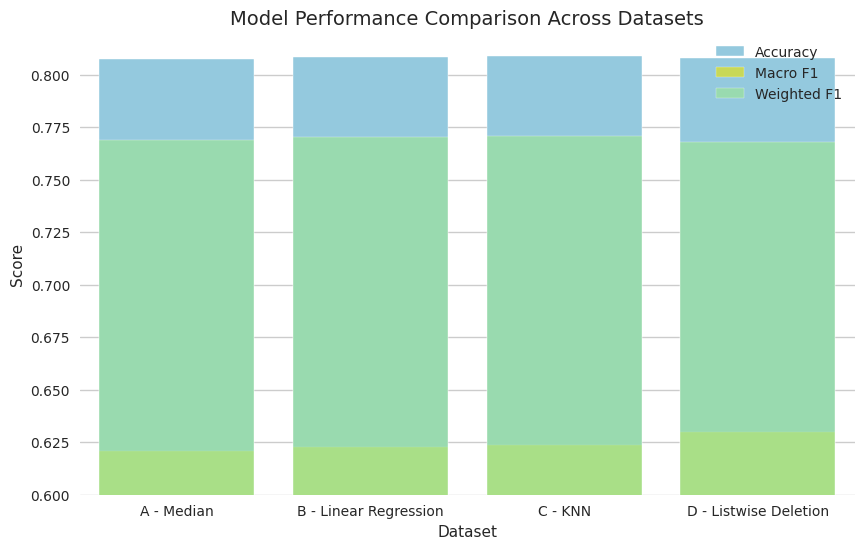

In [166]:
from sklearn.metrics import classification_report

def get_metrics_dict(y_true, y_pred, label):
    report = classification_report(y_true, y_pred, output_dict=True, digits=4)
    return {
        "Dataset": label,
        "Accuracy": report["accuracy"],
        "Precision (Macro)": report["macro avg"]["precision"],
        "Recall (Macro)": report["macro avg"]["recall"],
        "F1-Score (Macro)": report["macro avg"]["f1-score"],
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    }
from sklearn.linear_model import LogisticRegression

def get_preds(X_train, X_test, y_train):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_test)

y_pred_A = get_preds(X_train_A, X_test_A, y_train_A)
y_pred_B = get_preds(X_train_B, X_test_B, y_train_B)
y_pred_C = get_preds(X_train_C, X_test_C, y_train_C)
y_pred_D = get_preds(X_train_D, X_test_D, y_train_D)

metrics_A = get_metrics_dict(y_test_A, y_pred_A, "A - Median Imputation")
metrics_B = get_metrics_dict(y_test_B, y_pred_B, "B - Linear Regression Imputation")
metrics_C = get_metrics_dict(y_test_C, y_pred_C, "C - KNN (Non-linear) Imputation")
metrics_D = get_metrics_dict(y_test_D, y_pred_D, "D - Listwise Deletion")

summary_metrics = pd.DataFrame([metrics_A, metrics_B, metrics_C, metrics_D])
summary_metrics = summary_metrics.sort_values(by="F1-Score (Weighted)", ascending=False)

print("\n=====")
print("COMPARATIVE PERFORMANCE TABLE (Sorted by F1 Score)")
print("=====")
display(summary_metrics)


import matplotlib.pyplot as plt
import seaborn as sns

summary_df = pd.DataFrame({
    'Dataset': ['A - Median', 'B - Linear Regression', 'C - KNN', 'D - Listwise Deletion'],
    'Accuracy': [0.8075, 0.8085, 0.8087, 0.8082],
    'Macro F1': [0.620637, 0.622956, 0.623457, 0.629860],
    'Weighted F1': [0.769116, 0.770457, 0.770727, 0.767899]
})

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Dataset', y='Accuracy', data=summary_df, color='skyblue', label='Accuracy')
sns.barplot(x='Dataset', y='Macro F1', data=summary_df, color='yellow', alpha=0.7, label='Macro F1')
sns.barplot(x='Dataset', y='Weighted F1', data=summary_df, color='lightgreen', alpha=0.7, label='Weighted F1')

plt.title("Model Performance Comparison Across Datasets", fontsize=14)
plt.ylabel("Score")
plt.ylim(0.6, 0.82)
plt.legend()
plt.show()

The summary table provides all 4 metrics.

#Quick observations from Summary Table

**1. Macro Metrics (treating all classes equally):**

- **F1-Score (Macro) is highest for KNN (0.6235), indicating better balance between Precision and Recall for both classes.**

- Precision (Macro) is highest for Listwise Deletion (0.7598), suggesting that it predicts positive and negative classes slightly more evenly.

- Recall (Macro) is slightly better for KNN and Linear Regression (0.6060 and 0.6056) than Listwise Deletion (0.6009).

**2. Accuracy Comparison:**

- KNN (Non-linear, Dataset C) performs slightly best with 0.8087 accuracy.

- Linear Regression (Dataset B) and Listwise Deletion (Dataset D) are close, 0.8085 and 0.8082, respectively. (This maybe due to the fact that low missingness leads to model D performing well.)

- Median Imputation (Dataset A) has the lowest accuracy, 0.8075, though differences are small.

**3. Weighted Metrics (accounting for class imbalance):**

- Weighted metrics are very similar across all datasets, showing that the overall model performance is stable regardless of imputation method.

- KNN still slightly leads in F1-weighted (0.7707) compared to others.

# Comparable performance with little difference across all models

***Overall, all models perform comparably, with differences within ~0.1–0.2% in accuracy***

***This shows that the dataset is robust to small amounts of missing data and imputation strategy.***

# 1 i) Tradeoff between Imputation and deletion

**A) Listwise Deletion (Model D):**

Approach: Drops all rows containing any missing values.

- **Advantages:** It is very simple and straightforward. Guarantees that the dataset has no missing values.
- Ensures that the Logistic Regression model sees only complete cases, so no imputation bias is introduced.

- **Disadvantages:** It reduces dataset size, which can limit training data for the model.
- So it can increase variance in the model due to smaller sample size.
- If missingness is not completely random, dropping rows can introduce bias.

**B) Imputation (Models A, B, C):**

Approach: Replace missing values with estimated values rather than dropping them.

- **Advantages** - Preserves the full dataset size, which helps the model learn better patterns.
- Maintains relationships between features when done properly (e.g., regression imputation, KNN).

- **Disadvantages** It introduces some estimation error, the imputed values are approximations, not true values.
- Some methods may assume MAR (Missing At Random), and violations of this assumption can reduce performance.

**Hence, Deletion is safe but wastes data which may affect performance; imputation is more data-efficient but largely depends on accurate estimation of missing values**

# 1 ii) Why D performs poorly

- **Small Sample Size Risk**: Listwise deletion still reduces the number of training samples. Smaller sample size can **limit the model’s ability to learn nuanced patterns**, potentially reducing Recall and F1-score.

- Accuracy of Model D (Listwise Deletion) is 0.8082, similar to other models.

- However, **Macro Recall (0.6009) and Macro F1-score (0.6168) are slightly lower than KNN (C) and Linear Regression (B), indicating poorer balance across classes.**

- **Bias Risk**: Dropped rows may contain informative patterns. Even if overall accuracy remains close, the model can underperform for minority classes, as reflected in the lower macro metrics.

- **Less information retained compared to imputation models**: Imputation (A, B, C) preserves dataset size and feature correlations, allowing the model to leverage relationships between variables. This helps achieve more stable and generalizable predictions.

**Contextual observation**

Here, **missingness was only 5%,** so Listwise Deletion does not drastically reduce accuracy.

With **higher missingness, Model D would likely degrade further**, whereas imputed models would maintain more robust performance**

Conclusion: Even when overall accuracy is similar, imputation strategies usually provide more reliable and balanced performance across classes compared to Listwise Deletion

# 2) Comparing LR (linear) and KNN (non-linear)

- **KNN (non-linear) provides slightly better results than LR (linear)**
- When comparing the two regression imputation methods, **KNN (non-linear) imputation (Model C)** slightly outperformed **linear regression imputation (Model B)**. Model C achieved an accuracy of **0.8087**, marginally higher than Model B’s **0.8085**. Examining the macro metrics, Model C also had slightly better **macro precision (0.7555 vs. 0.7550)**, **macro recall (0.6060 vs. 0.6056)**, and **macro F1-score (0.6235 vs. 0.6229)**.
- These improvements, although small, indicate that** KNN imputation provides slightly more balanced predictions** across different classes compared to linear regression.

# Why is KNN better?

**Imputed features and predictors relationship:**

- The reason KNN performs better is related to the **assumed relationship between the imputed feature (`AGE`) and the predictors**.
- Linear regression assumes a strictly linear relationship, predicting missing values based on a straight-line combination of other features.
- However, in this dataset, predictors such as BILL_AMT1, BILL_AMT2, PAY_0, and other payment history variables likely influence `AGE` in **complex, non-linear ways**.
- KNN imputation, being a non-linear regression method, identifies the most similar rows in the predictor space and estimates missing values based on local patterns.
- This allows it to capture subtle, non-linear dependencies that linear regression cannot, producing imputations that better reflect the underlying distribution of the data.

**Robustness to outliers**

- Additionally, KNN is **more robust to outliers** in the predictor space compared to linear regression.
- Extreme values in bill amounts or payments can disproportionately affect a linear regression model’s predictions, whereas KNN considers local neighborhoods, reducing the influence of outliers.

Overall, although the differences in performance are modest, **non-linear regression (KNN) provides a more realistic and context-aware imputation**, preserving inter-variable relationships and yielding slightly more stable and balanced classification performance, as reflected in the macro metrics.


# 3) Final Recommendations and Analysis

# Analysis

Based on the classification performance metrics and the conceptual understanding of each missing-data handling method, **non-linear regression imputation (KNN, Model C) emerges as the most balanced and recommended strategy** for this dataset.

All imputation methods (Models A, B, and C) preserved the dataset size and achieved similar accuracy levels around **0.8075–0.8087**.

- **Macro Precision, Recall, and F1-score**: Model C achieved the highest macro precision (**0.7555**), recall (**0.6060**), and F1-score (**0.6235**) among the imputed models.

- These metrics reflect more balanced performance across both classes of the target variable, indicating that KNN imputation better preserves the underlying relationships and class distribution in the data.

- Linear regression imputation (Model B) was slightly lower in all macro metrics (precision 0.7550, recall 0.6056, F1 0.6229), suggesting that strict linear assumptions do not capture all dependencies in the predictors.

- **Median imputation (Model A) performed the worst among imputed datasets** in macro metrics, with recall and F1 dropping to 0.6039 and 0.6206 respectively, highlighting that simple statistical imputation ignores inter-variable relationships.

- **Listwise deletion (Model D)** achieved a comparable accuracy (**0.8082**) but suffered in macro recall (**0.6009**) and macro F1-score (**0.6168**). This indicates that while the overall correct classification rate seems reasonable, the model is less balanced across classes and loses potentially valuable information by dropping rows. **This risk is especially important in datasets with moderate to high missingness, where deleting rows could reduce statistical power and increase variance.**

**Conceptual Implications**:

- KNN imputation leverages non-linear relationships and local patterns in the predictor space, making it robust to outliers and subtle dependencies between features.
- Linear regression, while simple and interpretable, cannot capture complex interactions.
- Median imputation is fast and robust to extreme values but disregards inter-feature correlations entirely.
- Listwise deletion avoids imputation bias but sacrifices data and risks under-representation of certain patterns.

# Final Recommendation

**Recommendation**: **For this credit risk dataset with **moderate (5%) missingness**, ***Non-linear regression imputation (KNN)*** ,  capturing non-linear relationships which exist in the dataset, is the preferred approach.**. It preserves dataset size, maintains correlations among features, and produces slightly higher and **more balanced macro metrics (F1, Recall and Precision)**, supporting **more generalizable and stable predictions**.

- Linear regression imputation is acceptable as a secondary option if **interpretability** is prioritized. Analysts can better understand see which features influence the imputed values and by how much, helping with model interpretability

- Median imputation should only be considered when **computational simplicity** is critical since calculating the median is a one step process which can be used for the entire column.

- Listwise deletion is least recommended because **even with low missingness, it risks losing informative patterns** and can lead to poorer balance across classes, as reflected in the macro recall and F1-scores.


# C 3) Additional Visualisation and smoothed estimate of the distribution of AGE - 3 imputation methods

In order to better understand how imputation modifies the data, a few of the imputed values are printed along with the actual values.

Further, the kernel density estimation curves are plotted to see the distribution of values of the 'AGE' columm alone in all the 4 methods to compare it against the original dataset.

In [163]:
missing_indices = df_missing[df_missing['AGE'].isnull()].index

comparison_df = pd.DataFrame({
    'Original_with_MAR': df_missing.loc[missing_indices, 'AGE'],
    'Original_without_MAR': df.loc[missing_indices, 'AGE'],  # the clean dataset
    'Median': df_median_imputed.loc[missing_indices, 'AGE'],
    'Linear': df_linear_imputed.loc[missing_indices, 'AGE'],
    'KNN': df_knn_imputed.loc[missing_indices, 'AGE']
})

display(comparison_df.sample(5, random_state=42))


,Original_with_MAR,Original_without_MAR,Median,Linear,KNN
21813,NaN,25,34.0,29.610525,26.6
27172,NaN,33,34.0,32.460366,36.2
8739,NaN,39,34.0,30.792163,30.4
8525,NaN,36,34.0,37.742877,37.6
9252,NaN,34,34.0,32.090663,39.0


/tmp/ipython-input-3639581092.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AGE'], label='Original', shade=True, color='#1f77b4')
/tmp/ipython-input-3639581092.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_median_imputed['AGE'], label='Median Imputed', shade=True, color='#ff7f0e')
/tmp/ipython-input-3639581092.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_linear_imputed['AGE'], label='Linear Imputed', shade=True, color='#2ca02c')
/tmp/ipython-input-3639581092.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; 

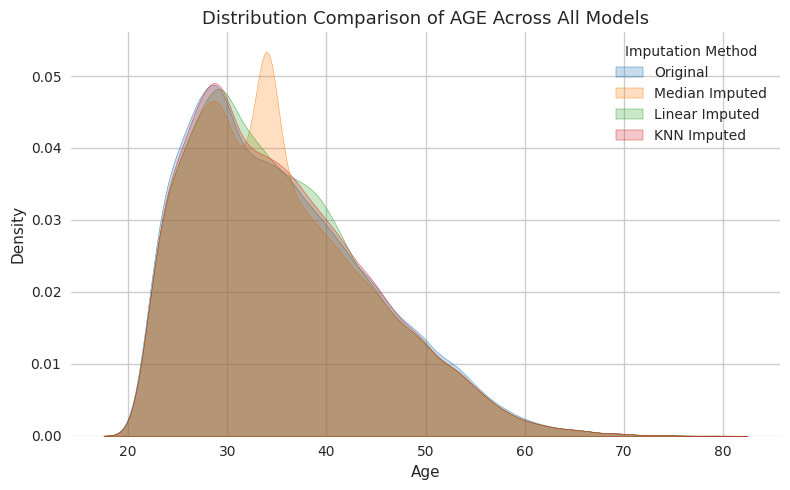

In [164]:
plt.figure(figsize=(8,5))

sns.kdeplot(df['AGE'], label='Original', shade=True, color='#1f77b4')
sns.kdeplot(df_median_imputed['AGE'], label='Median Imputed', shade=True, color='#ff7f0e')
sns.kdeplot(df_linear_imputed['AGE'], label='Linear Imputed', shade=True, color='#2ca02c')
sns.kdeplot(df_knn_imputed['AGE'], label='KNN Imputed', shade=True, color='#d62728')

plt.title("Distribution Comparison of AGE Across All Models", fontsize=13)
plt.xlabel("Age", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.legend(title="Imputation Method")
plt.tight_layout()
plt.show()


# Original values versus imputed values table

- The table shows that **KNN is similar to the original data at times for the selected samples, or Linear Regression is similar at times.** This may be a cue for why both their metrics are very similar.

- The median remains constant which does not remain close to most of the original dataset. This may affect its accuracy when we assume that age correlates well with the target variable.

# Comparing the density curves for the 3 imputation methods

- The density curves of **KNN and the original dataset overalap the most, indicating that most of the distribution is retained in KNN** (possibly explaining the high accuracy).
- The curve of Linear Regression also overlaps, except for minor deviations/ regions which lie outside the original dataset.
- The median value overlaps the least, unable to capture the variation in the dataset due to its constancy.

**If closeness to the exact distribution of age implies better accuracy, this could also imply that age is a feature that does affect the prediction of the target variable**

**These curves explain the accuracy levels in the imputation methods: KNN> Linear Regression > Median imputed**